# Project 5 $\cdot$ Julian Nowaczek

Setup environment:

In [2]:
import imageio
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import scipy.misc as misc
import scipy.ndimage as ndi
from skimage import io, color

In [51]:
plt.style.use(['seaborn-poster', {'axes.grid': False, 'image.cmap' : 'Greys_r'}])

original = misc.face()

## Question 1


Computing the average value for each of the RGB channels should produce a decent approximation of the color of the whole image, and it would be easy to increase the accuracy of the comparison by dividing the images into smaller sections.

In [4]:
misc.face().mean(axis=(0,1))

array([110.67604192, 117.72977066, 102.08241908])

## Question 2

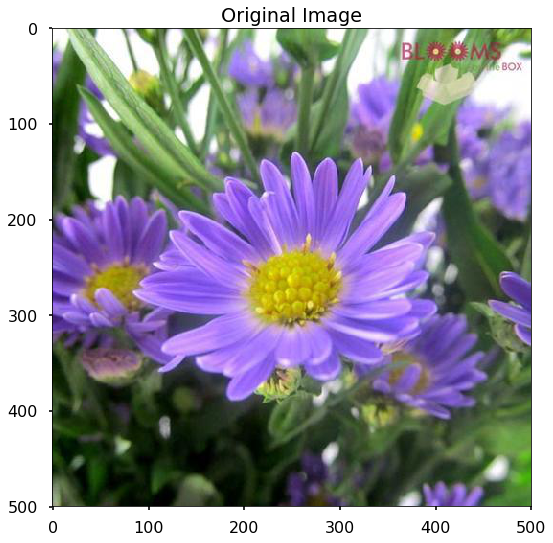

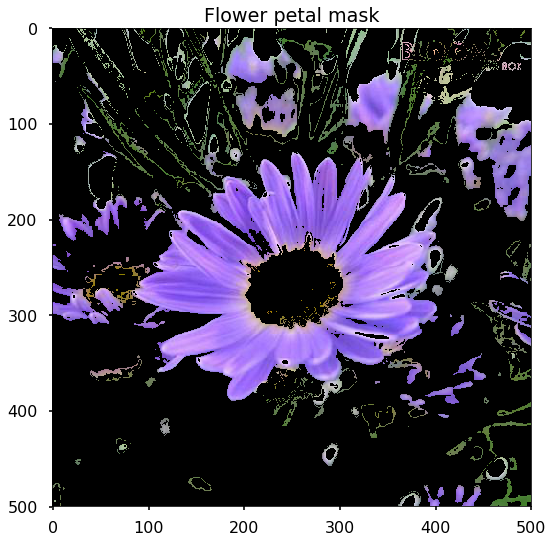

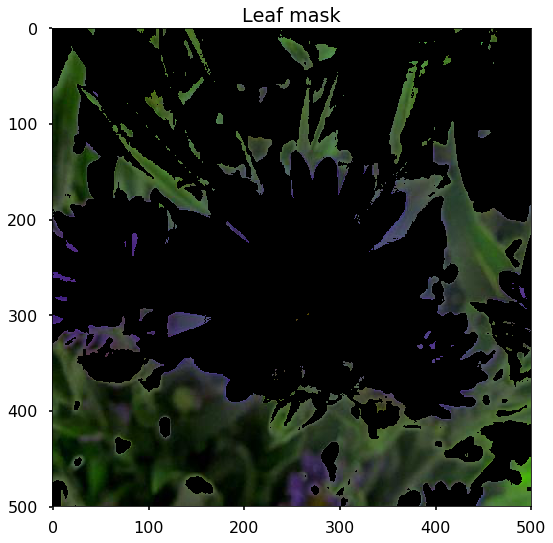

In [50]:
nature = imageio.imread('https://www.bloomsbythebox.com/img/product/xlarge/01377a__monte_casino_aster_purple.jpg')
plt.title('Original Image')
plt.imshow(nature)
plt.show()
flower_mask = np.ones(nature.shape[:2], dtype='uint8')
leaves_mask = np.ones(nature.shape[:2], dtype='uint8')
for index in np.ndindex(nature.shape[:2]):
    red, green, blue = nature[index][0], nature[index][1], nature[index][2] 
    if (blue < 200 and green < 120 or blue < 140 and green > 130 or green > 200):
        flower_mask[index] = 0
    if (red > 85 or blue > 140):
        leaves_mask[index] = 0
flower_mask = np.stack((flower_mask, flower_mask, flower_mask), axis=2)
leaves_mask = np.stack((leaves_mask, leaves_mask, leaves_mask), axis=2)
plt.title('Flower petal mask')
plt.imshow(np.multiply(flower_mask, nature))
plt.show()
plt.title('Leaf mask')
plt.imshow(np.multiply(leaves_mask, nature))
plt.show()

I found that it was impossible to guess-and-check my way to useable masks without looking at specific pixel values using the eyedropper tool in GIMP.

## Question 3

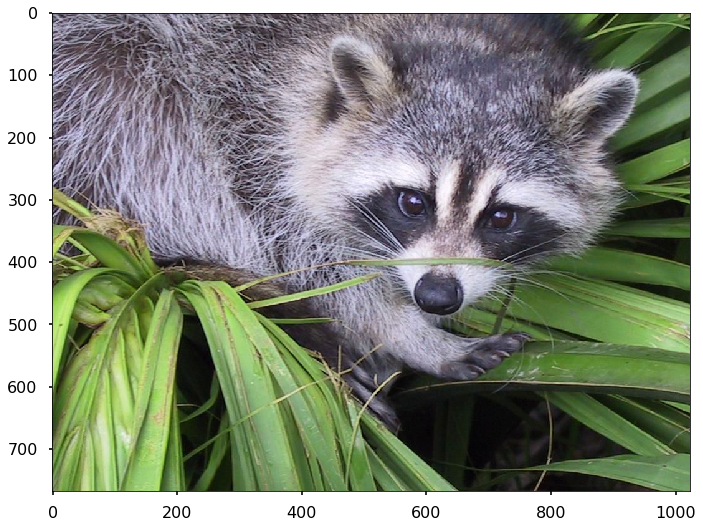

In [52]:
plt.imshow(original)
plt.show()

### A.

According to equation 6.2-1 in the textbook, the transformation from RGB color to CMY is the following equation assuming the RGB values are normalized to $[0,1]$

$$\begin{bmatrix}C \\ M \\ Y\end{bmatrix} = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix} - \begin{bmatrix}R \\ G \\ B\end{bmatrix}$$

It doesn't look like SciKit-Image has a function for this (apparently color gamut factors into the normalization so that probably has something to do with it), so I implement my own below

In [7]:
def rgb2cmy(image):
    normalized = np.zeros(image.shape, dtype='float')

    normalized[:,:,0] = image[:,:,0] / np.max(image[:,:,0])
    normalized[:,:,1] = image[:,:,1] / np.max(image[:,:,1])
    normalized[:,:,2] = image[:,:,2] / np.max(image[:,:,2])
    
    return np.ones(image.shape, dtype='float') - normalized

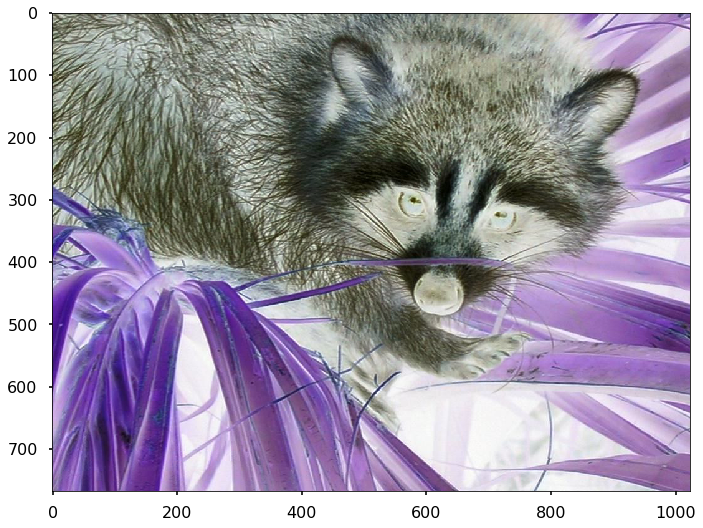

In [8]:
cmy_face = rgb2cmy(original)
plt.imshow(cmy_face)
plt.show()

I don't think a CMY colormap can exist, but at least it's inverted which is about what I expected.

### B.

### C.

### D.

## Question 4

## Question 5

## Question 6

### A.

### B.

### C.

## Question 7

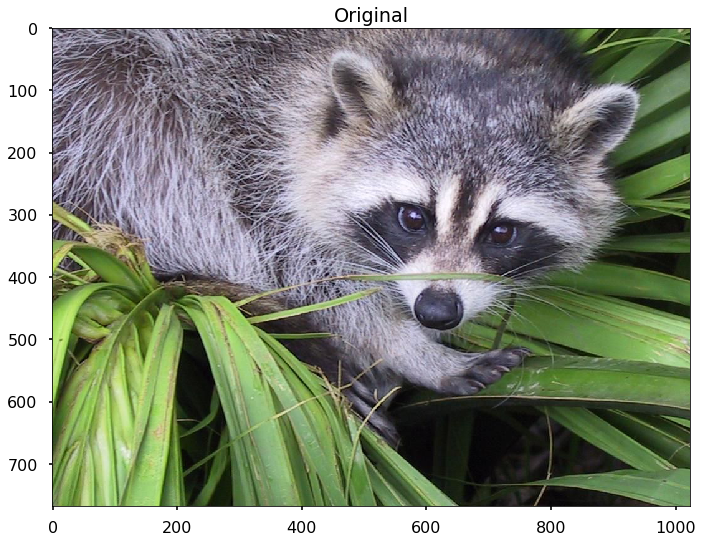

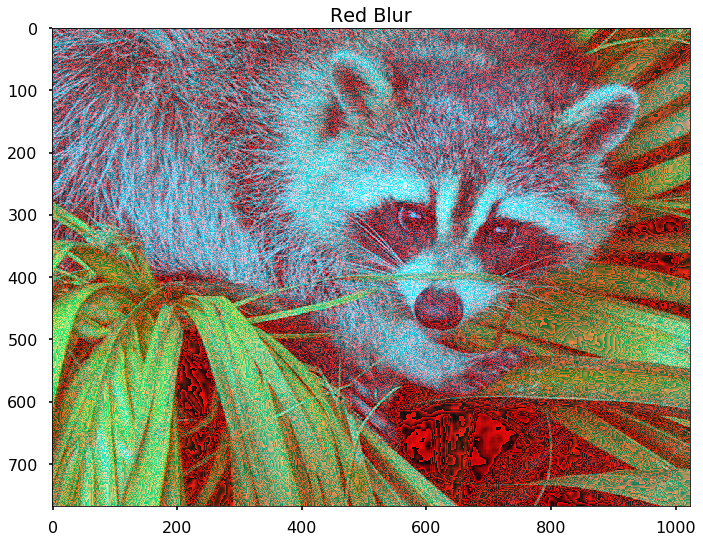

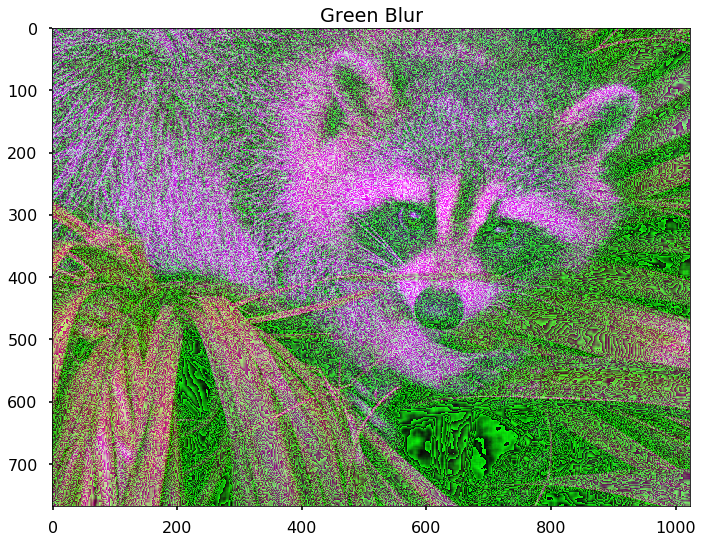

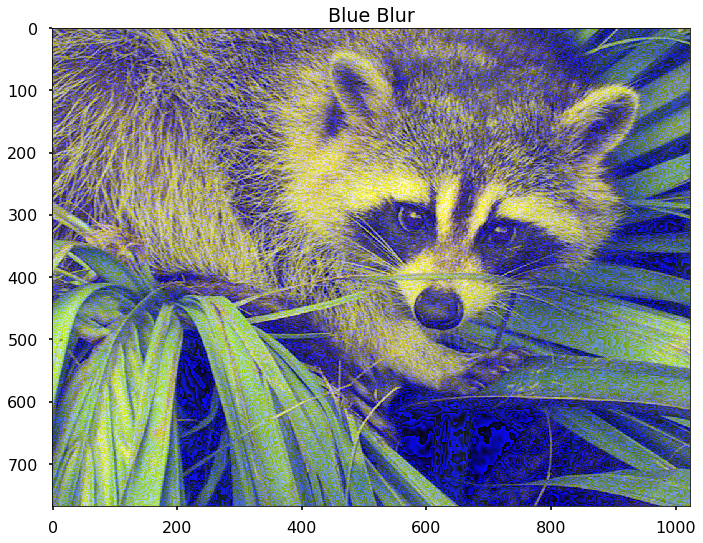

In [16]:
average = np.ones((9,9))
red, green, blue = original[:,:,0], original[:,:,1], original[:,:,2]
av_red, av_green, av_blue = ndi.filters.convolve(red, average), ndi.filters.convolve(green, average), ndi.filters.convolve(blue, average)
plt.title('Original')
plt.imshow(original)
plt.show()
plt.title('Red Blur')
plt.imshow(np.stack((av_red, green, blue), axis=2))
plt.show()
plt.title('Green Blur')
plt.imshow(np.stack((red, av_green, blue), axis=2))
plt.show()
plt.title('Blue Blur')
plt.imshow(np.stack((red, green, av_blue), axis=2))
plt.show()

I think this experiment demonstrates how our eyes are more sensitive to green, red, then blue since the change in the green channel is most dramatic, followed by red. The averaging of the blue channel does not disrupt the image nearly as much.

## Question 8

In [17]:
laplacian = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]


## Question 9